### PLotting the function f(x) = 1/(1+25x^2)

### Import libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt

### Define the function

In [7]:
def f(x):
    return 1 / (1 + 25 * x**2)

### Define the Domain [-1,1], Plot the function f(x) using matplotlib

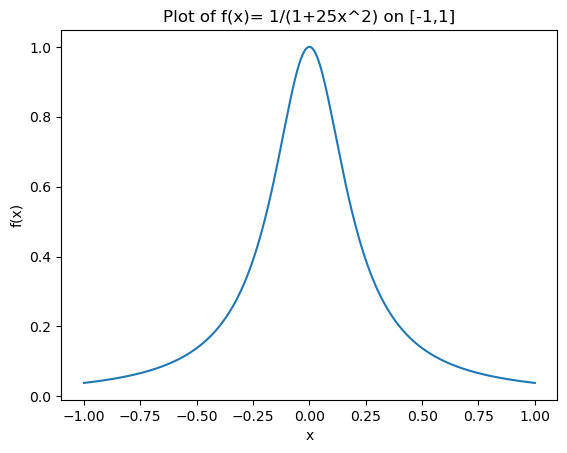

In [8]:

#domain
x = np.linspace(-1, 1, 500)  # 500 points between -1 and 1
y = f(x)

# plot
plt.plot(x, y, label=r"$f(x) = \frac{1}{1+25x^2}$")
plt.title("Plot of f(x)= 1/(1+25x^2) on [-1,1]")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

#### Fitting it using a Lagrange Polynomial
- Define the function that runs the Aitken-Neville algorithm, 
- Mention the nb of nodes we want usnig the variable M.
- Plot the interpolation (and f(x)), compare it with the function we are trying to approximate : f(x) = 1/(1+25x^2)


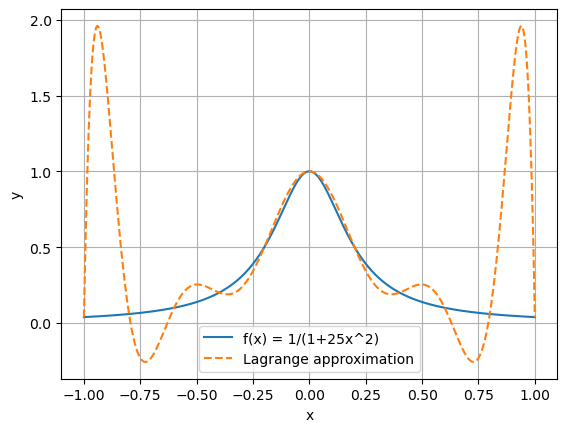

In [9]:
#Aitken–Neville interpolation algo 
def neville(xd, yd, x):
    m = len(xd) # number of data points
    P = yd.astype(float).copy() # copy y of data points
    for k in range(1, m):
        for i in range(m - k):
            xi=xd[i]
            xik =xd[i + k]
            P[i] = ((x - xik) * P[i] + (xi - x) * P[i + 1]) / (xi - xik)
    return P[0]


M = 11 # nb of nodes
x_nodes = np.linspace(-1, 1, M)




# Ploting 
xx = np.linspace(-1, 1, 600)
y_inter = [neville(x_nodes, f(x_nodes), xv) for xv in xx]
plt.plot(xx, f(xx), label="f(x) = 1/(1+25x^2)")
plt.plot(xx, y_inter, "--", label=f"Lagrange approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


### Fitting using Cubic Spline INterpolation 
we use cubic interpolation function from earlier exercice,we define a new function that evaluates 

In [10]:

def cubic_spline(x, y, n_segments):
    n_coeffs = 4 * n_segments
    A = np.zeros((n_coeffs, n_coeffs))
    b = np.zeros(n_coeffs)
    row = 0
    
    # Condition 1: Function values match at segment endpoints
    for i in range(n_segments):
        # Left endpoint
        A[row, 4*i:4*i+4] = [x[i]**3, x[i]**2, x[i], 1]
        b[row] = y[i]
        row += 1
        
        # Right endpoint
        A[row, 4*i:4*i+4] = [x[i+1]**3, x[i+1]**2, x[i+1], 1]
        b[row] = y[i+1]
        row += 1
    
    # Condition 2: First derivatives continuous at interior points
    for i in range(n_segments - 1):
        A[row, 4*i:4*i+3] = [3*x[i+1]**2, 2*x[i+1], 1]
        A[row, 4*(i+1):4*(i+1)+3] = [-3*x[i+1]**2, -2*x[i+1], -1]
        b[row] = 0
        row += 1
    
    # Condition 3: Second derivatives continuous at interior points
    for i in range(n_segments - 1):
        A[row, 4*i:4*i+2] = [6*x[i+1], 2]
        A[row, 4*(i+1):4*(i+1)+2] = [-6*x[i+1], -2]
        b[row] = 0
        row += 1

    # Condition 4: Natural boundary conditions (second derivative = 0 at endpoints)
    A[row, 0:2] = [6*x[0], 2]
    b[row] = 0
    row += 1
    
    A[row, 4*(n_segments-1):4*(n_segments-1)+2] = [6*x[-1], 2]
    b[row] = 0
    
    # Solve the system
    coeffs = np.linalg.solve(A, b)
    
    return coeffs.reshape(n_segments, 4)

def evaluate_spline(x_eval, x_data, coeffs):
    y_eval = np.zeros_like(x_eval)
    
    for i, x in enumerate(x_eval):
        # Find which segment this x belongs to
        segment = -1
        for j in range(len(x_data) - 1):
            if x_data[j] <= x <= x_data[j + 1]:
                segment = j
                break
        
        # Handle points outside the domain
        if segment == -1:
            if x < x_data[0]:
                segment = 0
            else:
                segment = len(x_data) - 2
        
        # Evaluate the cubic polynomial for this segment
        # P(x) = a*x³ + b*x² + c*x + d
        a, b, c, d = coeffs[segment]
        y_eval[i] = a*x**3 + b*x**2 + c*x + d
    
    return y_eval


#### NOw we plot the cubic interpolation

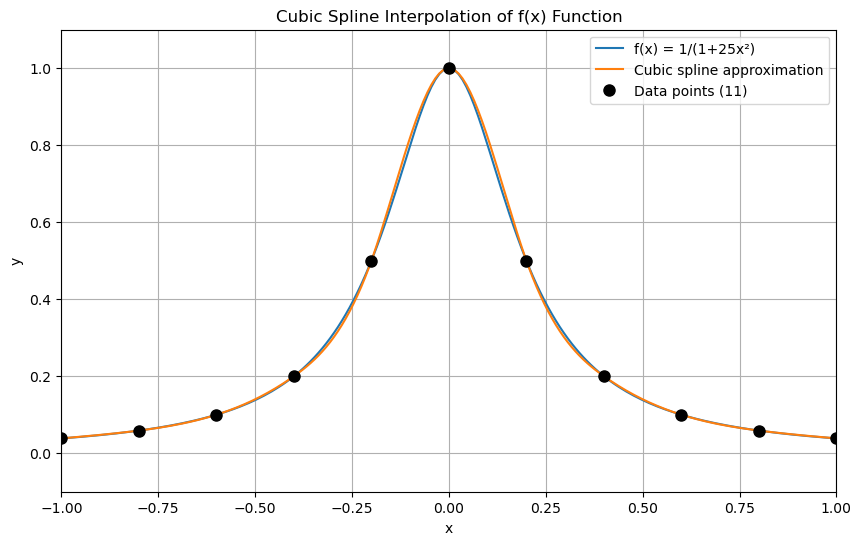

In [23]:
n = 11
x_data = np.linspace (-1, 1, n)
y_data = f(x_data)
n_segments = n - 1
coeffs = cubic_spline(x_data, y_data, n_segments)

x_plot = np.linspace(-1, 1, 200)
y_true = f(x_plot)
y_spline = evaluate_spline(x_plot, x_data, coeffs)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_true,label='f(x) = 1/(1+25x²)')
plt.plot(x_plot, y_spline, label='Cubic spline approximation')
plt.plot(x_data, y_data, 'ko', markersize=8, label=f'Data points ({n})')
    
plt.xlim(-1, 1)
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend()
plt.title('Cubic Spline Interpolation of f(x) Function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### What went wrong?
During the lagrnage interpolation, We can clearly se the runge phenomenon happening near the endpoints, where we get a few peak, and that peak gets larger when we increase the nb of nodes (the varibale m), However  the cubic spline interpolation gave a much better approximation in this case. that is becasue